In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
# Load the dataset
data = pd.read_csv('Sales_Data.csv')

# Display the first few rows
print(data)


   Order Date      Product  Quantity Ordered  Price Each  Customer ID Region
0    10/01/24       Laptop                 1      999.99        12345   East
1    15/01/24   Headphones                 2       99.99        12346   West
2    05/02/24      Monitor                 1      199.99        12347   East
3    10/02/24  USB-C Cable                 3       11.99        12348  South
4    22/03/24     Keyboard                 2       49.99        12349  North
5    30/03/24   Smartphone                 1      699.99        12350   West
6    05/04/24       Laptop                 1      999.99        12351  South
7    12/04/24        Mouse                 4       19.99        12352  North
8    18/04/24      Monitor                 2      199.99        12353   East
9    02/05/24   Headphones                 1       99.99        12354   East
10   10/05/24  USB-C Cable                 5       11.99        12355  South
11   01/06/24     Keyboard                 3       49.99        12356  North

In [16]:
# Remove rows with missing values
data = data.dropna()

# Remove duplicates
data = data.drop_duplicates()

# Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%y', errors='coerce')

# Convert 'Quantity Ordered' and 'Price Each' to numeric
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'], errors='coerce')
data['Price Each'] = pd.to_numeric(data['Price Each'], errors='coerce')

# Drop rows with invalid data
data = data.dropna()

print(data)

   Order Date      Product  Quantity Ordered  Price Each  Customer ID Region
0  2024-01-10       Laptop                 1      999.99        12345   East
1  2024-01-15   Headphones                 2       99.99        12346   West
2  2024-02-05      Monitor                 1      199.99        12347   East
3  2024-02-10  USB-C Cable                 3       11.99        12348  South
4  2024-03-22     Keyboard                 2       49.99        12349  North
5  2024-03-30   Smartphone                 1      699.99        12350   West
6  2024-04-05       Laptop                 1      999.99        12351  South
7  2024-04-12        Mouse                 4       19.99        12352  North
8  2024-04-18      Monitor                 2      199.99        12353   East
9  2024-05-02   Headphones                 1       99.99        12354   East
10 2024-05-10  USB-C Cable                 5       11.99        12355  South
11 2024-06-01     Keyboard                 3       49.99        12356  North

In [18]:
# Add a 'Total Sales' column
data['Total Sales'] = data['Quantity Ordered'] * data['Price Each']

print(data)

# Extract month from 'Order Date'
data['Month'] = data['Order Date'].dt.month

   Order Date      Product  Quantity Ordered  Price Each  Customer ID Region  \
0  2024-01-10       Laptop                 1      999.99        12345   East   
1  2024-01-15   Headphones                 2       99.99        12346   West   
2  2024-02-05      Monitor                 1      199.99        12347   East   
3  2024-02-10  USB-C Cable                 3       11.99        12348  South   
4  2024-03-22     Keyboard                 2       49.99        12349  North   
5  2024-03-30   Smartphone                 1      699.99        12350   West   
6  2024-04-05       Laptop                 1      999.99        12351  South   
7  2024-04-12        Mouse                 4       19.99        12352  North   
8  2024-04-18      Monitor                 2      199.99        12353   East   
9  2024-05-02   Headphones                 1       99.99        12354   East   
10 2024-05-10  USB-C Cable                 5       11.99        12355  South   
11 2024-06-01     Keyboard              

In [24]:
# Total sales per month
monthly_sales = data.groupby('Month')['Total Sales'].sum()

# Best-selling products
best_selling_products = data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

print("Monthly Sales:\n", monthly_sales)
print("\nBest-Selling Products:\n", best_selling_products.head())


Monthly Sales:
 Month
1     1199.97
2      235.96
3      799.97
4     1479.93
5      159.94
6     2149.95
7      939.96
8     1049.98
9      535.94
10     949.96
11     271.93
12    1899.96
Name: Total Sales, dtype: float64

Best-Selling Products:
 Product
USB-C Cable    17
Headphones      8
Keyboard        7
Monitor         7
Laptop          6
Name: Quantity Ordered, dtype: int64


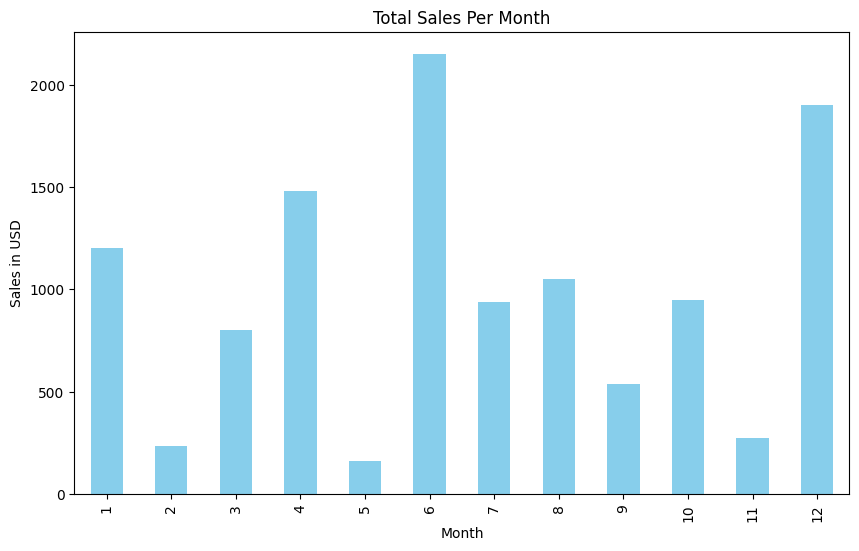

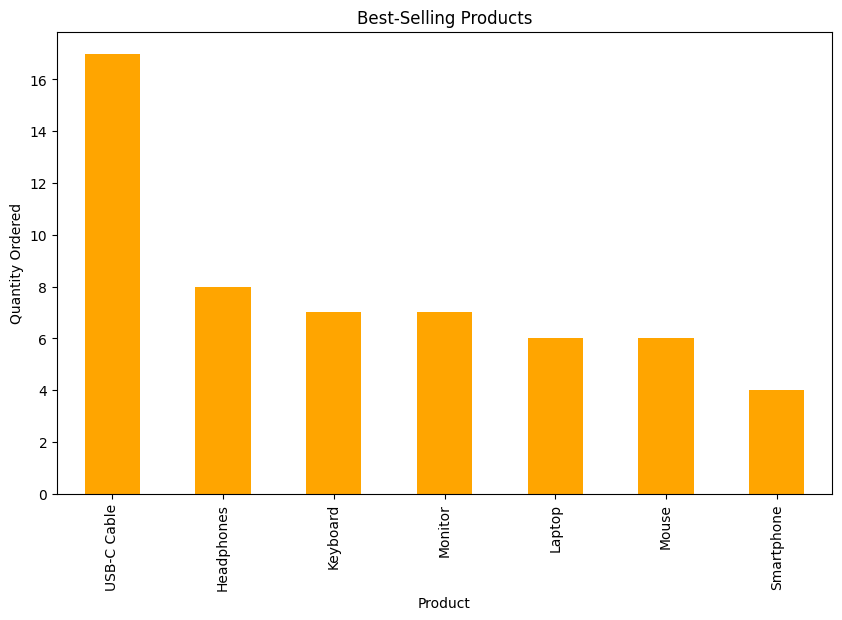

In [25]:
# Plot total sales per month
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales Per Month')
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.show()

# Plot best-selling products
plt.figure(figsize=(10, 6))
best_selling_products.plot(kind='bar', color='orange')
plt.title('Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=90)
plt.show()

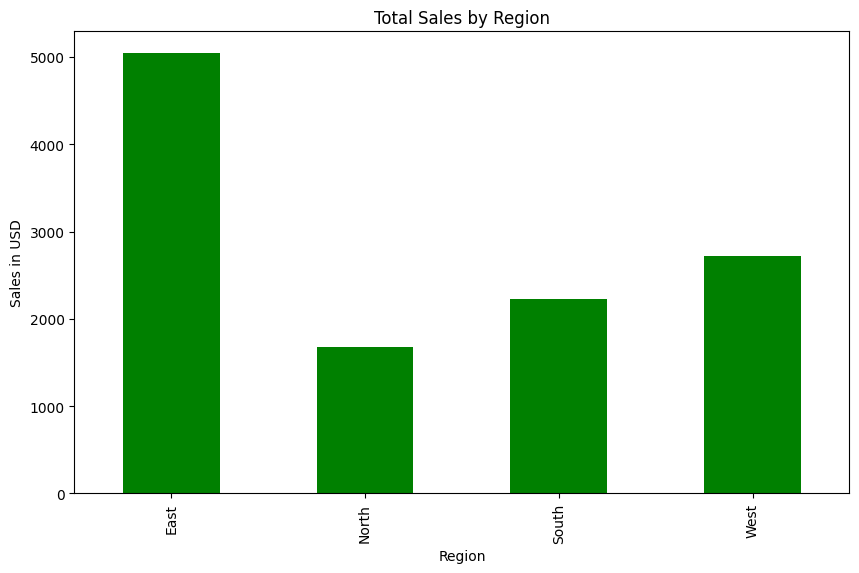

In [27]:
# Total sales by region
regional_sales = data.groupby('Region')['Total Sales'].sum()

# Plot regional sales
plt.figure(figsize=(10, 6))
regional_sales.plot(kind='bar', color='green')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales in USD')
plt.show()

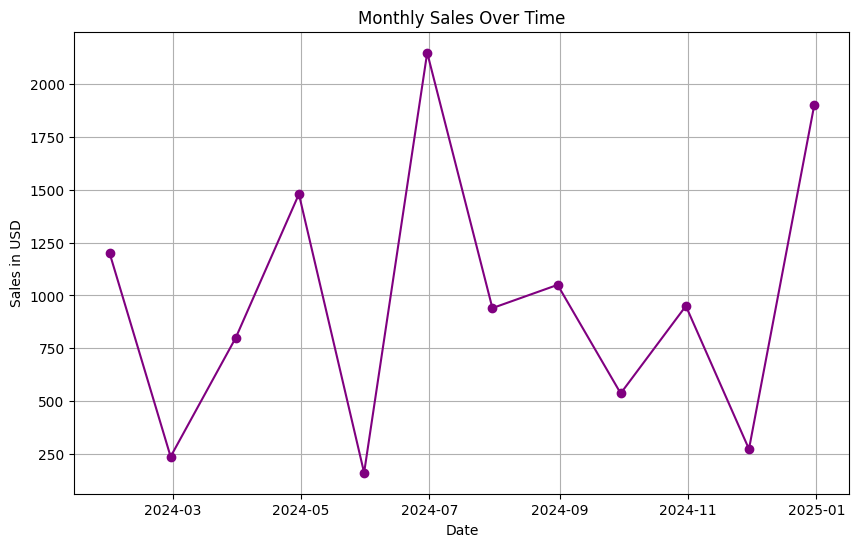

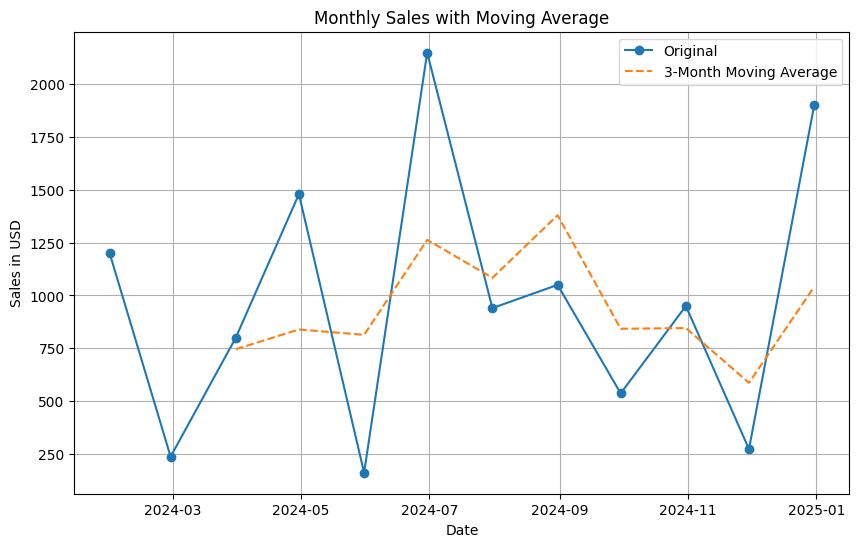

In [28]:
# Resample data to get monthly sales
monthly_sales = data.resample('M', on='Order Date').sum()['Total Sales']

# Plot the time series of monthly sales
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales, marker='o', color='purple')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales in USD')
plt.grid(True)
plt.show()

# Optional: Use a simple moving average to smooth the data
monthly_sales_sma = monthly_sales.rolling(window=3).mean()
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales, marker='o', label='Original')
plt.plot(monthly_sales_sma, label='3-Month Moving Average', linestyle='--')
plt.title('Monthly Sales with Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales in USD')
plt.legend()
plt.grid(True)
plt.show()
